# Correlation between counts across peak subsets

In [1]:
import os
os.chdir('/home/katie/bp_repo/reports/')

from util import import_profiles
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from IPython.display import display
import tqdm

import sys
sys.path.append('/home/katie/bp_repo/multitask_profile_model_SPI_GATA/')
import profile_performance
from profile_performance import *

tqdm.tqdm_notebook()

plt.rcParams["figure.dpi"] = 130

/tmp/ipykernel_74624/1646331730.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm.tqdm_notebook()


0it [00:00, ?it/s]

In [6]:
# load in preds
path = '/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/'

preds_dict = {}
keys = ['CTCF_chip_model_shared_chip_loader_fake_controls',
 'CTCF_cut_model_shared_chip_loader',
 'CTCF_chip_model_shared_cut_loader_fake_controls',
 'CTCF_cut_model_shared_cut_loader',
 'CTCF_chip_model_unique_chip_loader_fake_controls',
 'CTCF_cut_model_unique_chip_loader',
 'CTCF_chip_model_unique_cut_loader_fake_controls',
 'CTCF_cut_model_unique_cut_loader',
 'FOSL2_chip_model_shared_chip_loader_fake_controls',
 'FOSL2_cut_model_shared_chip_loader',
 'FOSL2_chip_model_shared_cut_loader_fake_controls',
 'FOSL2_cut_model_shared_cut_loader',
 'FOSL2_chip_model_unique_chip_loader_fake_controls',
 'FOSL2_cut_model_unique_chip_loader',
 'FOSL2_chip_model_unique_cut_loader_fake_controls',
 'FOSL2_cut_model_unique_cut_loader']

# the surprisingly quick (few secs) actual preds loading
for key in keys:
    file = h5py.File(f'{path}{key}.preds', 'r')
    true_counts = np.reshape(np.mean(np.array(file['predictions']['true_counts']), axis=-1), -1) # avg over strands & reshape to vector
    pred_counts = np.reshape(np.mean(np.array(file['predictions']['log_pred_counts']), axis=-1), -1) # avg over strands & reshape to vector
    coords = import_profiles(f'{path}{key}.preds')[2]
    preds_dict[key] = {'true_counts': true_counts, 'pred_counts': pred_counts, 'coords': coords}
    
# n.b. pred_counts are log pred counts

# because of reverse complement augmentation, we need to:
# 1. take the coords, make into a DataFrame, drop duplicates, and get the indexes of the unique coords
# 2. use the unique indexes to subset pred_counts into the unique profs (getting rid of rev comp)
for key in preds_dict:
    preds_dict[key]['coords_unique'] = pd.DataFrame(preds_dict[key]['coords']).drop_duplicates().reset_index()
    preds_dict[key]['indexes_unique'] = list(preds_dict[key]['coords_unique']['index'])
    preds_dict[key]['true_counts_unique'] = preds_dict[key]['true_counts'][preds_dict[key]['indexes_unique']]
    preds_dict[key]['pred_counts_unique'] = preds_dict[key]['pred_counts'][preds_dict[key]['indexes_unique']]

Importing predictions:   0%|          | 0/62 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/62 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/60 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/60 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/10 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/10 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/49 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/49 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/54 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/54 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/51 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/51 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/14 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/14 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/41 [00:00<?, ?it/s]

Importing predictions:   0%|          | 0/41 [00:00<?, ?it/s]

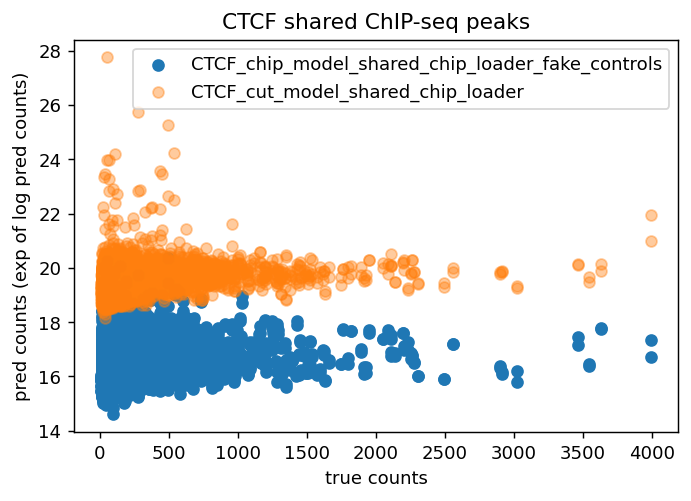

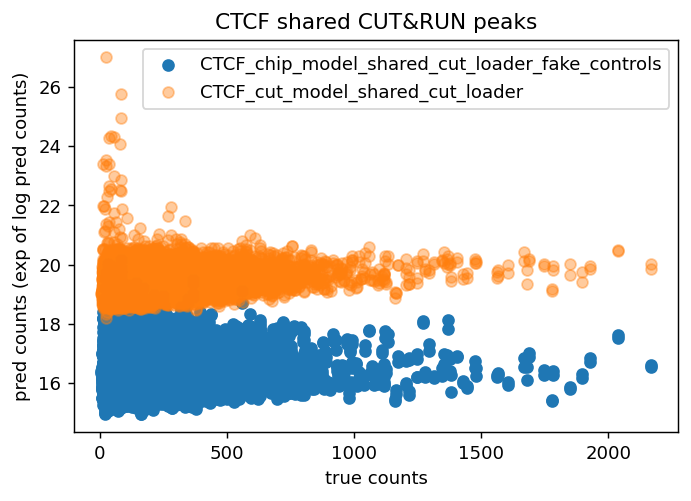

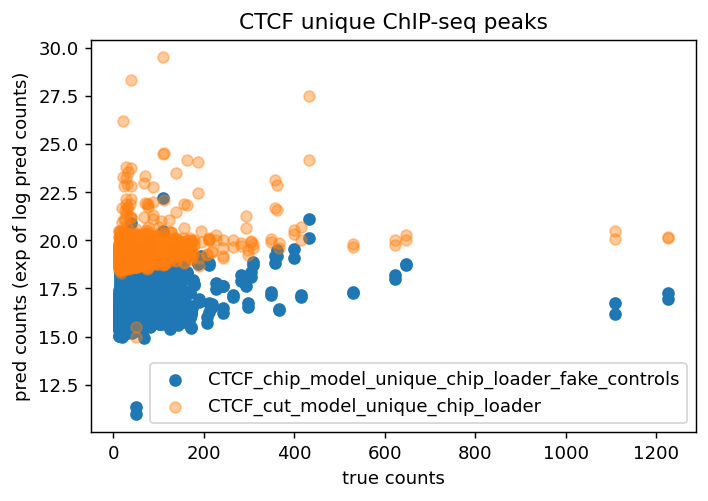

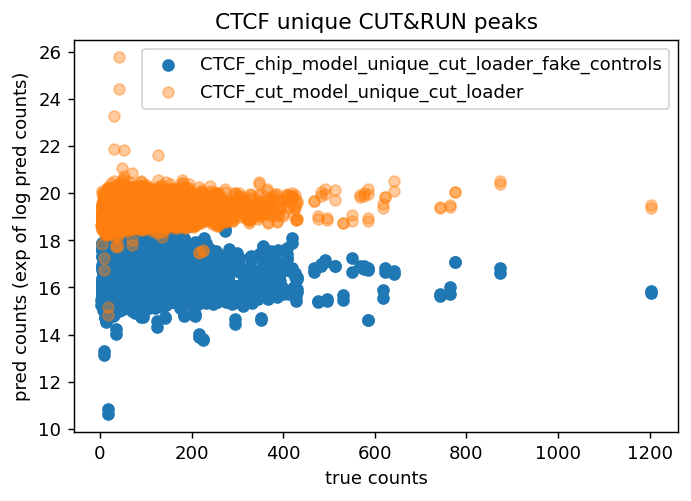

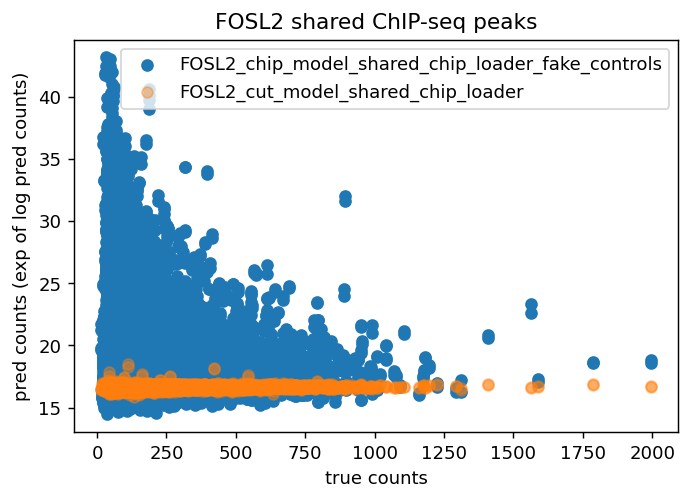

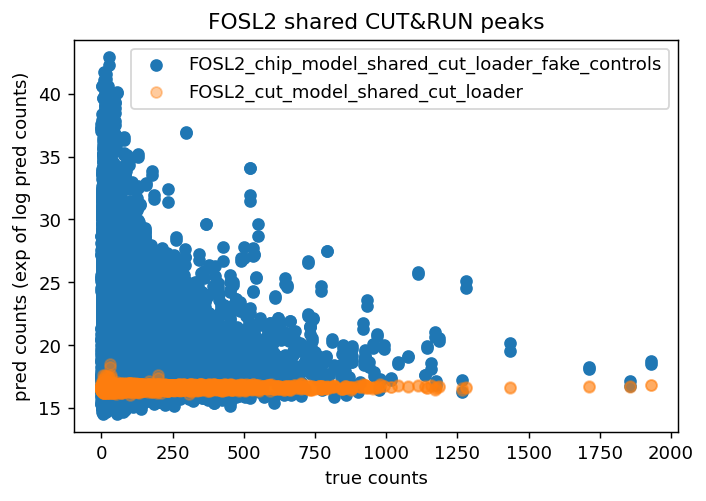

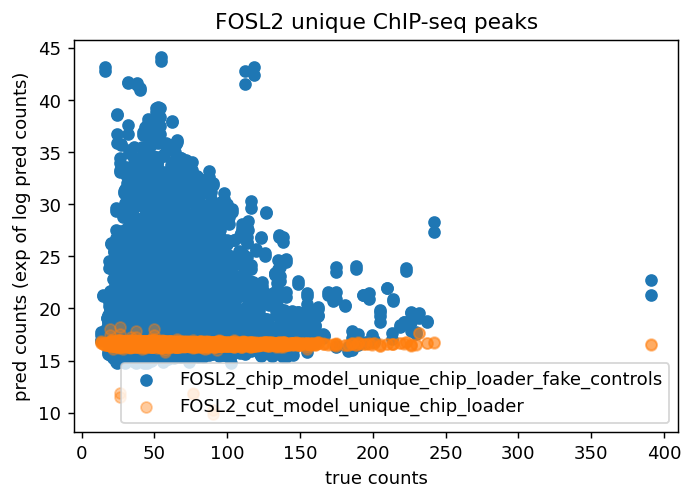

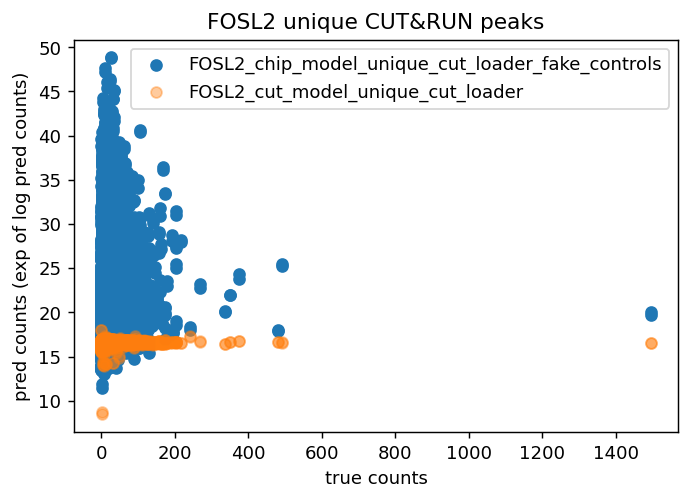

In [22]:
# scatterplot of true vs pred counts, across each subset
for i in range(8):
    keys = key_pairs[i]
    plt.figure()
    plt.scatter(preds_dict[keys[0]]['true_counts'], np.exp(preds_dict[keys[0]]['pred_counts']), label=keys[0])
    plt.scatter(preds_dict[keys[1]]['true_counts'], np.exp(preds_dict[keys[1]]['pred_counts']), label=keys[1], alpha=0.4)
    plt.xlabel('true counts')
    plt.ylabel('pred counts (exp of log pred counts)')
    plt.legend()
    plt.title(columns[i])

In [15]:
key_pairs = [ ('CTCF_chip_model_shared_chip_loader_fake_controls', 'CTCF_cut_model_shared_chip_loader'),
              ('CTCF_chip_model_shared_cut_loader_fake_controls', 'CTCF_cut_model_shared_cut_loader'),
              ('CTCF_chip_model_unique_chip_loader_fake_controls', 'CTCF_cut_model_unique_chip_loader'),
              ('CTCF_chip_model_unique_cut_loader_fake_controls', 'CTCF_cut_model_unique_cut_loader'),
              ('FOSL2_chip_model_shared_chip_loader_fake_controls', 'FOSL2_cut_model_shared_chip_loader'),
              ('FOSL2_chip_model_shared_cut_loader_fake_controls', 'FOSL2_cut_model_shared_cut_loader'),
              ('FOSL2_chip_model_unique_chip_loader_fake_controls', 'FOSL2_cut_model_unique_chip_loader'),
              ('FOSL2_chip_model_unique_cut_loader_fake_controls', 'FOSL2_cut_model_unique_cut_loader')]

In [16]:
columns = ['CTCF shared ChIP-seq peaks', 'CTCF shared CUT&RUN peaks', 'CTCF unique ChIP-seq peaks', 'CTCF unique CUT&RUN peaks',
           'FOSL2 shared ChIP-seq peaks', 'FOSL2 shared CUT&RUN peaks', 'FOSL2 unique ChIP-seq peaks', 'FOSL2 unique CUT&RUN peaks']
indexes = ['Pearson on log pred counts']
metrics = pd.DataFrame(columns=columns, index=indexes)

In [23]:
pearson_pred = {}
for key in key_pairs:
    pearson_pred[key] = np.round(pearson_corr(preds_dict[key[0]]['pred_counts'], preds_dict[key[1]]['pred_counts']), 2)
    
# update metrics DataFrame
metrics.iloc[0,:] = list(pearson_pred.values())

In [24]:
metrics

,CTCF shared ChIP-seq peaks,CTCF shared CUT&RUN peaks,CTCF unique ChIP-seq peaks,CTCF unique CUT&RUN peaks,FOSL2 shared ChIP-seq peaks,FOSL2 shared CUT&RUN peaks,FOSL2 unique ChIP-seq peaks,FOSL2 unique CUT&RUN peaks
Pearson on log pred counts,0.65,0.65,0.63,0.7,-0.24,-0.23,-0.18,-0.15
